# Figure 2 (Revised)
Minimal reproduction of the paper_figures_083024 Figure 2 Revised bar plots.


In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
# Configuration
expt_name = 'fp_scaled'
experiment_names = [
    'OLv7_M36_MULTI_type_13_comb_fp_scaled',
    'DAv7_M36_ASCAT_type_13_comb_fp_scaled',
    'DAv7_M36_ASCAT_bugfix',
    'DAv7_M36_SMAP_type_13_comb_fp_scaled',
    'DAv7_M36_MULTI_type_13_comb_fp_scaled',
]
insitu_tag = '_CalVal_M33_SM_3h__6yr'
data_dir = Path('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/DAv7_M36_MULTI_type_13_comb_fp_scaled')
matlab_files = [data_dir / f"{name}{insitu_tag}_stats.mat" for name in experiment_names]

# Load shape from first file
first_file = matlab_files[0]
mat_contents = sio.loadmat(first_file)
shape = mat_contents['Bias'].shape
num_exp = len(matlab_files)

# Preallocate
Bias = np.zeros(shape + (num_exp,)); BiasLO = np.zeros_like(Bias); BiasUP = np.zeros_like(Bias)
RMSE = np.zeros_like(Bias); RMSELO = np.zeros_like(Bias); RMSEUP = np.zeros_like(Bias)
R = np.zeros_like(Bias); RLO = np.zeros_like(Bias); RUP = np.zeros_like(Bias)
absBias = np.zeros_like(Bias); absBiasLO = np.zeros_like(Bias); absBiasUP = np.zeros_like(Bias)
anomR = np.zeros_like(Bias); anomRLO = np.zeros_like(Bias); anomRUP = np.zeros_like(Bias)
ubRMSE = np.zeros_like(Bias); ubRMSELO = np.zeros_like(Bias); ubRMSEUP = np.zeros_like(Bias)

# Populate arrays from each experiment
for i, file in enumerate(matlab_files):
    mc = sio.loadmat(file)
    Bias[:, :, i] = mc['Bias']; BiasLO[:, :, i] = mc['BiasLO']; BiasUP[:, :, i] = mc['BiasUP']
    RMSE[:, :, i] = mc['RMSE']; RMSELO[:, :, i] = mc['RMSELO']; RMSEUP[:, :, i] = mc['RMSEUP']
    R[:, :, i] = mc['R']; RLO[:, :, i] = mc['RLO']; RUP[:, :, i] = mc['RUP']
    absBias[:, :, i] = mc['absBias']; absBiasLO[:, :, i] = mc['absBiasLO']; absBiasUP[:, :, i] = mc['absBiasUP']
    anomR[:, :, i] = mc['anomR']; anomRLO[:, :, i] = mc['anomRLO']; anomRUP[:, :, i] = mc['anomRUP']
    ubRMSE[:, :, i] = mc['ubRMSE']; ubRMSELO[:, :, i] = mc['ubRMSELO']; ubRMSEUP[:, :, i] = mc['ubRMSEUP']

# labels and counts
expt_labels = ["CNTL", "ASC_DA", "ASC_BF", "SMP_DA", "MLT_DA"]
num_expts = 5


In [3]:
# Compute means and CIs
R_mean = np.around(np.nanmean(R, axis=0), decimals=2)
R_std = np.around(np.nanstd(R, axis=0), decimals=3)
num_sites_sr = np.sum(~np.isnan(R), axis=0)
R_CI_LO = np.around(np.nanmean(RLO, axis=0) / np.sqrt(num_sites_sr), decimals=4)
R_CI_UP = np.around(np.nanmean(RUP, axis=0) / np.sqrt(num_sites_sr), decimals=4)
R_CI = np.array([-R_CI_LO, R_CI_UP])

anomR_mean = np.around(np.nanmean(anomR, axis=0), decimals=2)
anomR_std = np.around(np.nanstd(anomR, axis=0), decimals=3)
num_sites_sr = np.sum(~np.isnan(anomR), axis=0)
anomR_CI_LO = np.around(np.nanmean(anomRLO, axis=0) / np.sqrt(num_sites_sr), decimals=4)
anomR_CI_UP = np.around(np.nanmean(anomRUP, axis=0) / np.sqrt(num_sites_sr), decimals=4)
anomR_CI = np.array([-anomR_CI_LO, anomR_CI_UP])

ubRMSE_mean = np.around(np.nanmean(ubRMSE, axis=0), decimals=3)
ubRMSE_std = np.around(np.nanstd(ubRMSE, axis=0), decimals=3)
num_sites_sr = np.sum(~np.isnan(ubRMSE), axis=0)
ubRMSE_CI_LO = np.around(np.nanmean(ubRMSELO, axis=0) / np.sqrt(num_sites_sr), decimals=4)
ubRMSE_CI_UP = np.around(np.nanmean(ubRMSEUP, axis=0) / np.sqrt(num_sites_sr), decimals=4)
ubRMSE_CI = np.array([-ubRMSE_CI_LO, ubRMSE_CI_UP])


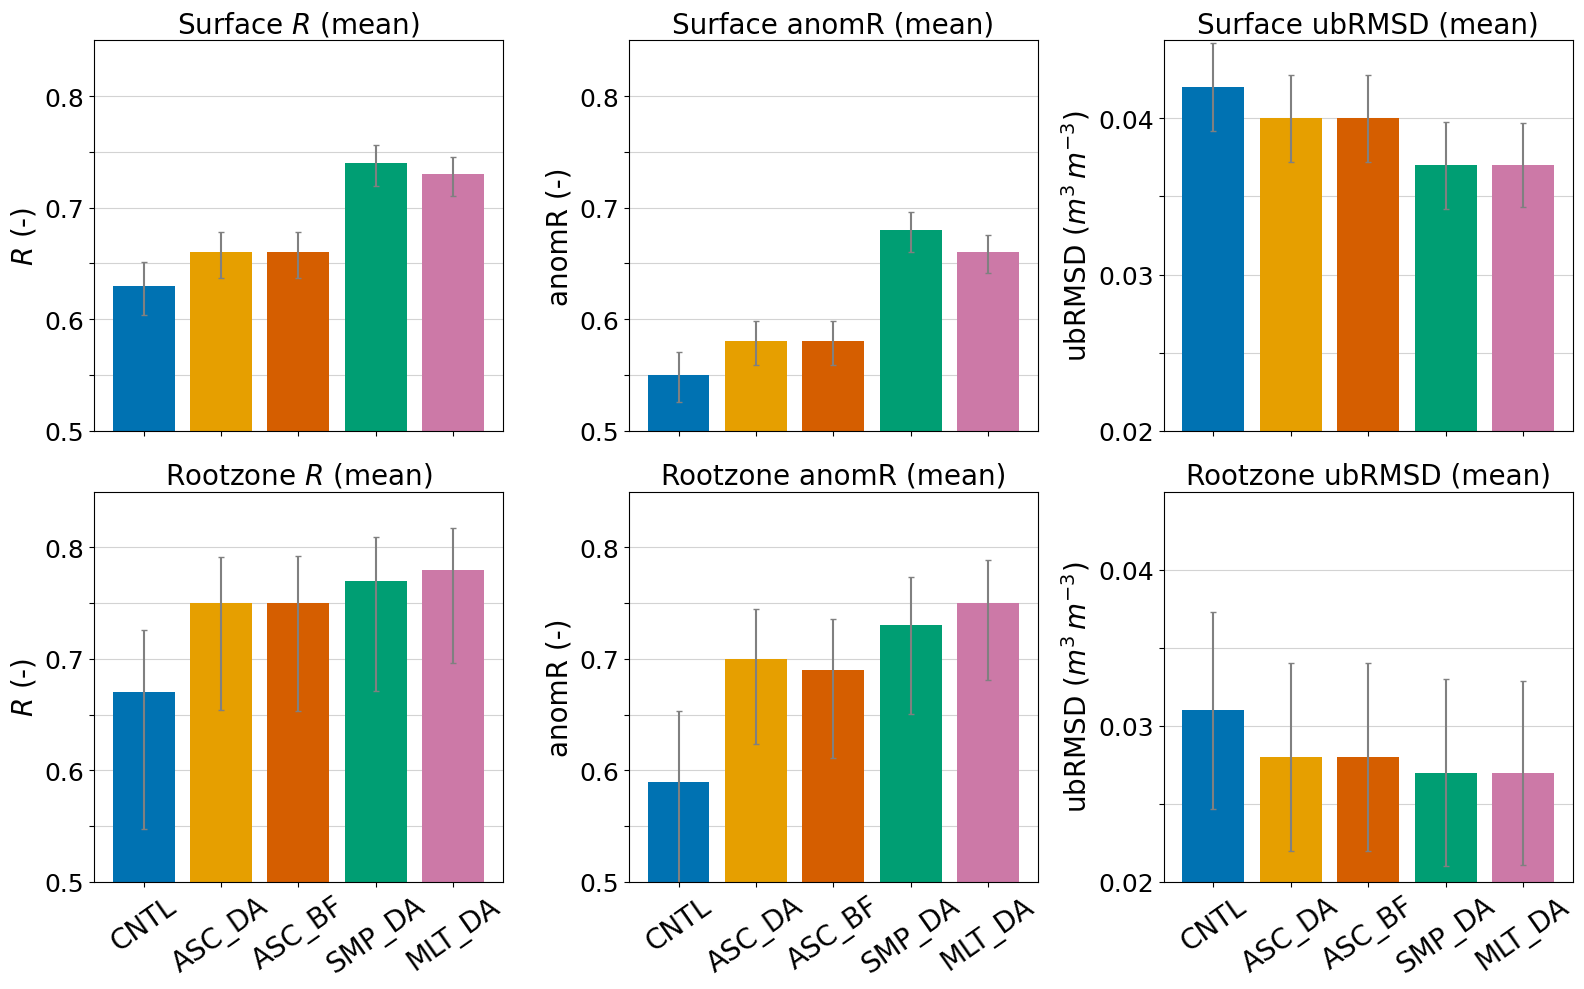

In [4]:
# Figure 2 - Revised bars
colors = ['#0072B2', '#E69F00', '#D55E00', '#009E73', '#CC79A7']
ind = np.arange(num_expts)
title_fontsize = 20
label_fontsize = 20
y_tick_label_fontsize = 18

fig, axs = plt.subplots(2, 3, figsize=(16, 10))

# Surface R
axs[0, 0].bar(ind, R_mean[0, :num_expts], color=colors[:num_expts])
axs[0, 0].errorbar(ind, R_mean[0, :num_expts], yerr=R_CI[:, 0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 0].set_ylabel(r'$R$ (-)', fontsize=label_fontsize)
axs[0, 0].set_ylim(0.5, 0.85)
axs[0, 0].set_yticks(np.arange(0.5, 0.85, 0.05))
axs[0, 0].set_yticklabels([0.5, ' ', 0.6, ' ', 0.7, ' ', 0.8], fontsize=y_tick_label_fontsize)
axs[0, 0].set_axisbelow(True)
axs[0, 0].grid(axis='y', color='lightgrey')
axs[0, 0].set_title(r'Surface $R$ (mean)', fontsize=title_fontsize)
axs[0, 0].set_xticks(ind); axs[0, 0].set_xticklabels('', fontsize=1)

# Surface anomR
axs[0, 1].bar(ind, anomR_mean[0, :num_expts], color=colors[:num_expts])
axs[0, 1].errorbar(ind, anomR_mean[0, :num_expts], yerr=anomR_CI[:, 0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 1].set_ylabel('anomR (-)', fontsize=label_fontsize)
axs[0, 1].set_ylim(0.5, 0.85)
axs[0, 1].set_yticks(np.arange(0.5, 0.85, 0.05))
axs[0, 1].set_yticklabels([0.5, ' ', 0.6, ' ', 0.7, ' ', 0.8], fontsize=y_tick_label_fontsize)
axs[0, 1].set_axisbelow(True)
axs[0, 1].grid(axis='y', color='lightgrey')
axs[0, 1].set_title('Surface anomR (mean)', fontsize=title_fontsize)
axs[0, 1].set_xticks(ind); axs[0, 1].set_xticklabels('', fontsize=1)

# Surface ubRMSD
axs[0, 2].bar(ind, ubRMSE_mean[0, :num_expts], color=colors[:num_expts])
axs[0, 2].errorbar(ind, ubRMSE_mean[0, :num_expts], yerr=ubRMSE_CI[:, 0, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[0, 2].set_ylabel('ubRMSD ($m^3 \, m^{-3}$)', fontsize=label_fontsize)
axs[0, 2].set_ylim(0.02, 0.045)
axs[0, 2].set_yticks(np.arange(0.02, 0.045, 0.005))
axs[0, 2].set_yticklabels([0.02, ' ', 0.03, ' ', 0.04], fontsize=y_tick_label_fontsize)
axs[0, 2].set_axisbelow(True)
axs[0, 2].grid(axis='y', color='lightgrey')
axs[0, 2].set_title('Surface ubRMSD (mean)', fontsize=title_fontsize)
axs[0, 2].set_xticks(ind); axs[0, 2].set_xticklabels('', fontsize=1)

# Rootzone R
axs[1, 0].bar(ind, R_mean[1, :num_expts], color=colors[:num_expts])
axs[1, 0].errorbar(ind, R_mean[1, :num_expts], yerr=R_CI[:, 1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 0].set_ylabel(r'$R$ (-)', fontsize=label_fontsize)
axs[1, 0].set_ylim(0.5, 0.85)
axs[1, 0].set_yticks(np.arange(0.5, 0.85, 0.05))
axs[1, 0].set_yticklabels([0.5, ' ', 0.6, ' ', 0.7, ' ', 0.8], fontsize=y_tick_label_fontsize)
axs[1, 0].set_axisbelow(True)
axs[1, 0].grid(axis='y', color='lightgrey')
axs[1, 0].set_title(r'Rootzone $R$ (mean)', fontsize=title_fontsize)
axs[1, 0].set_xticks(ind); axs[1, 0].set_xticklabels(expt_labels[:num_expts], rotation=35, fontsize=label_fontsize)

# Rootzone anomR
axs[1, 1].bar(ind, anomR_mean[1, :num_expts], color=colors[:num_expts])
axs[1, 1].errorbar(ind, anomR_mean[1, :num_expts], yerr=anomR_CI[:, 1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 1].set_ylabel('anomR (-)', fontsize=label_fontsize)
axs[1, 1].set_ylim(0.5, 0.85)
axs[1, 1].set_yticks(np.arange(0.5, 0.85, 0.05))
axs[1, 1].set_yticklabels([0.5, ' ', 0.6, ' ', 0.7, ' ', 0.8], fontsize=y_tick_label_fontsize)
axs[1, 1].set_axisbelow(True)
axs[1, 1].grid(axis='y', color='lightgrey')
axs[1, 1].set_title('Rootzone anomR (mean)', fontsize=title_fontsize)
axs[1, 1].set_xticks(ind); axs[1, 1].set_xticklabels(expt_labels[:num_expts], rotation=35, fontsize=label_fontsize)

# Rootzone ubRMSD
axs[1, 2].bar(ind, ubRMSE_mean[1, :num_expts], color=colors[:num_expts])
axs[1, 2].errorbar(ind, ubRMSE_mean[1, :num_expts], yerr=ubRMSE_CI[:, 1, :num_expts], fmt='none', ecolor='grey', capsize=2)
axs[1, 2].set_ylabel('ubRMSD ($m^3 \, m^{-3}$)', fontsize=label_fontsize)
axs[1, 2].set_ylim(0.02, 0.045)
axs[1, 2].set_yticks(np.arange(0.02, 0.045, 0.005))
axs[1, 2].set_yticklabels([0.02, ' ', 0.03, ' ', 0.04], fontsize=y_tick_label_fontsize)
axs[1, 2].set_axisbelow(True)
axs[1, 2].grid(axis='y', color='lightgrey')
axs[1, 2].set_title('Rootzone ubRMSD (mean)', fontsize=title_fontsize)
axs[1, 2].set_xticks(ind); axs[1, 2].set_xticklabels(expt_labels[:num_expts], rotation=35, fontsize=label_fontsize)

plt.tight_layout()
# plt.savefig(expt_name + '_surf_rz_stats_revised_300dpi.png', dpi=300)
plt.show()


In [5]:
# Table of values used in the bar plot
import pandas as pd

rows = []
for depth_label, depth_idx in [('Surface', 0), ('Rootzone', 1)]:
    for metric_name, mean_arr, ci_arr in [
        ('R', R_mean, R_CI),
        ('anomR', anomR_mean, anomR_CI),
        ('ubRMSD', ubRMSE_mean, ubRMSE_CI),
    ]:
        for i, label in enumerate(expt_labels):
            rows.append({
                'Depth': depth_label,
                'Metric': metric_name,
                'Experiment': label,
                'Mean': mean_arr[depth_idx, i],
                'CI_low': ci_arr[0, depth_idx, i],
                'CI_high': ci_arr[1, depth_idx, i],
            })

df = pd.DataFrame(rows)
print(df)
df


       Depth  Metric Experiment   Mean  CI_low  CI_high
0    Surface       R       CNTL  0.630  0.0263   0.0210
1    Surface       R     ASC_DA  0.660  0.0233   0.0186
2    Surface       R     ASC_BF  0.660  0.0232   0.0185
3    Surface       R     SMP_DA  0.740  0.0208   0.0160
4    Surface       R     MLT_DA  0.730  0.0198   0.0155
5    Surface   anomR       CNTL  0.550  0.0242   0.0208
6    Surface   anomR     ASC_DA  0.580  0.0210   0.0182
7    Surface   anomR     ASC_BF  0.580  0.0210   0.0181
8    Surface   anomR     SMP_DA  0.680  0.0194   0.0161
9    Surface   anomR     MLT_DA  0.660  0.0184   0.0156
10   Surface  ubRMSD       CNTL  0.042  0.0028   0.0028
11   Surface  ubRMSD     ASC_DA  0.040  0.0028   0.0028
12   Surface  ubRMSD     ASC_BF  0.040  0.0028   0.0028
13   Surface  ubRMSD     SMP_DA  0.037  0.0028   0.0028
14   Surface  ubRMSD     MLT_DA  0.037  0.0027   0.0027
15  Rootzone       R       CNTL  0.670  0.1228   0.0557
16  Rootzone       R     ASC_DA  0.750  0.0959  

,Depth,Metric,Experiment,Mean,CI_low,CI_high
0,Surface,R,CNTL,0.630,0.0263,0.0210
1,Surface,R,ASC_DA,0.660,0.0233,0.0186
2,Surface,R,ASC_BF,0.660,0.0232,0.0185
3,Surface,R,SMP_DA,0.740,0.0208,0.0160
4,Surface,R,MLT_DA,0.730,0.0198,0.0155
5,Surface,anomR,CNTL,0.550,0.0242,0.0208
6,Surface,anomR,ASC_DA,0.580,0.0210,0.0182
7,Surface,anomR,ASC_BF,0.580,0.0210,0.0181
8,Surface,anomR,SMP_DA,0.680,0.0194,0.0161
9,Surface,anomR,MLT_DA,0.660,0.0184,0.0156


Number of relative differences > 500%: 44
Number of finite relative differences: 76614


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_12273/1054481306.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('RdBu_r', len(edges)-1)


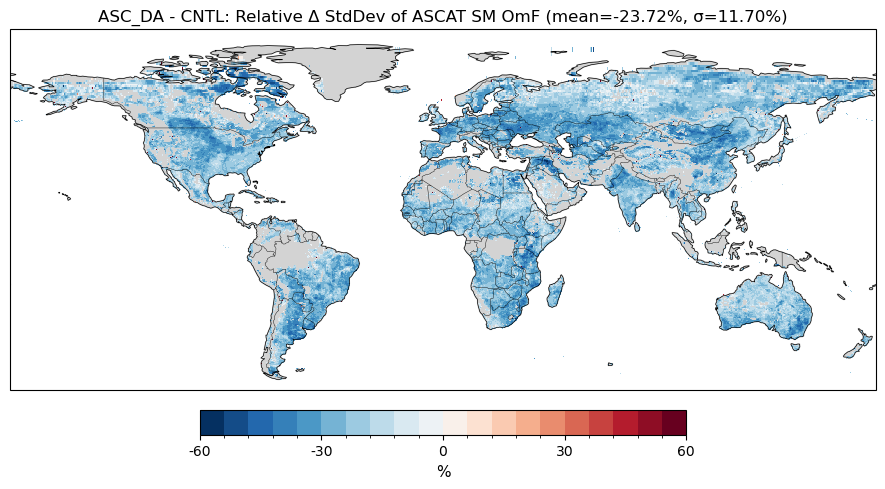

Mean relative difference: -23.72020143973364
Stddev of relative difference: 11.697320706883234


In [8]:
# Relative Δ StdDev of ASCAT SM OmF (ASC_DA vs CNTL) — pcolormesh
import sys
from pathlib import Path
from datetime import datetime
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

import sys
repo_root = Path('/Users/amfox/Desktop/geosldas-analysis')
sys.path.append(str(repo_root / 'common' / 'python' / 'plotting'))
from geospatial_plotting import load_ease_grid, build_ease_grid_mapping
expt_1_name = 'OLv7_M36_MULTI_type_13_comb_fp_scaled'
expt_2_name = 'DAv7_M36_ASCAT_type_13_comb_fp_scaled'
ex1_label = 'CNTL'
ex2_label = 'ASC_DA'
start_date = datetime(2015, 4, 1)
end_date   = datetime(2021, 4, 1)
start_date_str = start_date.strftime('%Y%m%d')
end_date_str   = end_date.strftime('%Y%m%d')
comp_dir = Path('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/DAv7_M36_MULTI_type_13_comb_fp_scaled')

# Load NPZ stats for the two experiments
f1 = comp_dir / f"{expt_1_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz"
f2 = comp_dir / f"{expt_2_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz"
ex1 = np.load(f1, allow_pickle=True)
ex2 = np.load(f2, allow_pickle=True)

ex1_std_obs_minus_fcst_a = ex1['std_obs_minus_fcst_ascat']
ex2_std_obs_minus_fcst_a = ex2['std_obs_minus_fcst_ascat']
lon = ex1['lon_tilenum'].flatten()
lat = ex1['lat_tilenum'].flatten()

# Relative difference (%), mask baseline zeros
rel = np.full(lon.shape, np.nan)
valid = ex1_std_obs_minus_fcst_a != 0
rel[valid] = (ex2_std_obs_minus_fcst_a[valid] - ex1_std_obs_minus_fcst_a[valid]) / ex1_std_obs_minus_fcst_a[valid] * 100.0

print('Number of relative differences > 500%:', np.sum(rel > 500))
print('Number of finite relative differences:', np.sum(np.isfinite(rel)))
rel[rel > 500] = np.nan

# Map to EASE grid for pcolormesh
lats_ease, lons_ease = load_ease_grid(); lats_row, lons_col = lats_ease[:,1], lons_ease[1,:]
lon_grid, lat_grid = np.meshgrid(lons_col, lats_row)
map_array = np.column_stack([rel, lon, lat])
grid = build_ease_grid_mapping(map_array, lats_row, lons_col)

vmin, vmax = -60, 60
edges = np.linspace(vmin, vmax, 21)
cmap = get_cmap('RdBu_r', len(edges)-1)
norm = BoundaryNorm(edges, cmap.N)

fig, ax = plt.subplots(figsize=(12, 5), subplot_kw={'projection': ccrs.PlateCarree()})
pc = ax.pcolormesh(lon_grid, lat_grid, grid, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
mean_val = np.nanmean(rel); std_val = np.nanstd(rel)
ax.set_title(f'{ex2_label} - {ex1_label}: Relative Δ StdDev of ASCAT SM OmF (mean={mean_val:.2f}%, σ={std_val:.2f}%)', fontsize=12)
ax.tick_params(labelsize=10)

cbar = plt.colorbar(pc, ax=ax, orientation='horizontal', pad=0.05, fraction=0.06)
cbar.set_label('%', fontsize=11)
cbar.set_ticks(edges[::5])
cbar.ax.set_xticklabels([f"{t:.0f}" for t in edges[::5]])
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

print('Mean relative difference:', mean_val)
print('Stddev of relative difference:', std_val)


ASC_DA: relative >500%: 0
ASC_DA: finite: 76570


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_12273/88675871.py:49: RuntimeWarning: invalid value encountered in divide
  val = np.nansum(Om[:, asc_idx] * Nm[:, asc_idx], axis=1) / w


DA_BF: relative >500%: 0 finite: 74077
DA_BUG: relative >500%: 0 finite: 74077


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_12273/88675871.py:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('RdBu_r', len(edges) - 1)


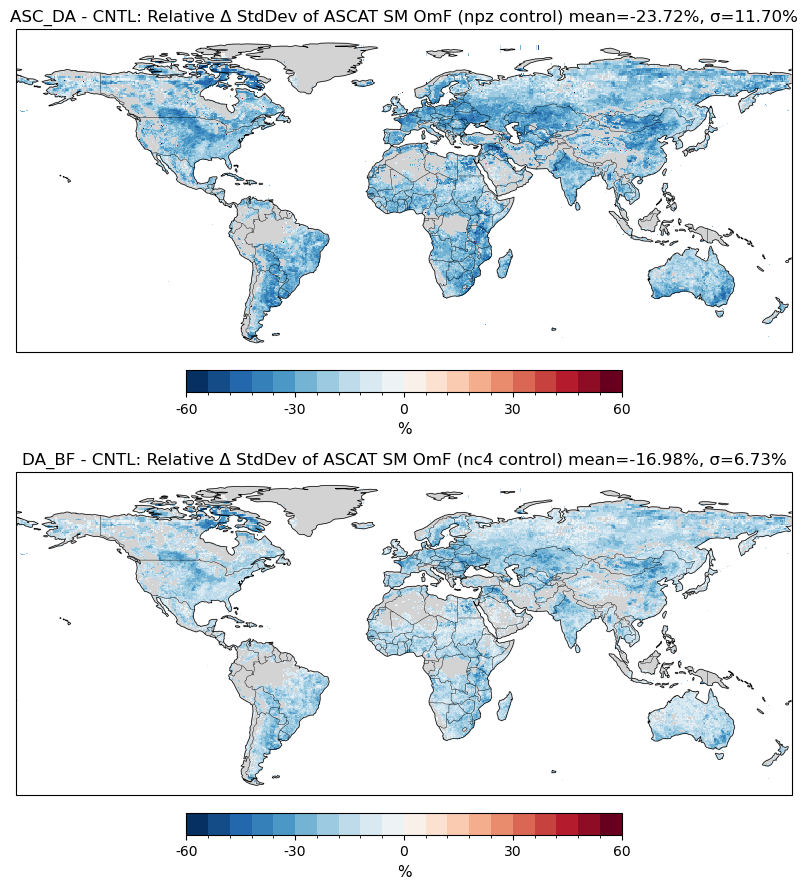

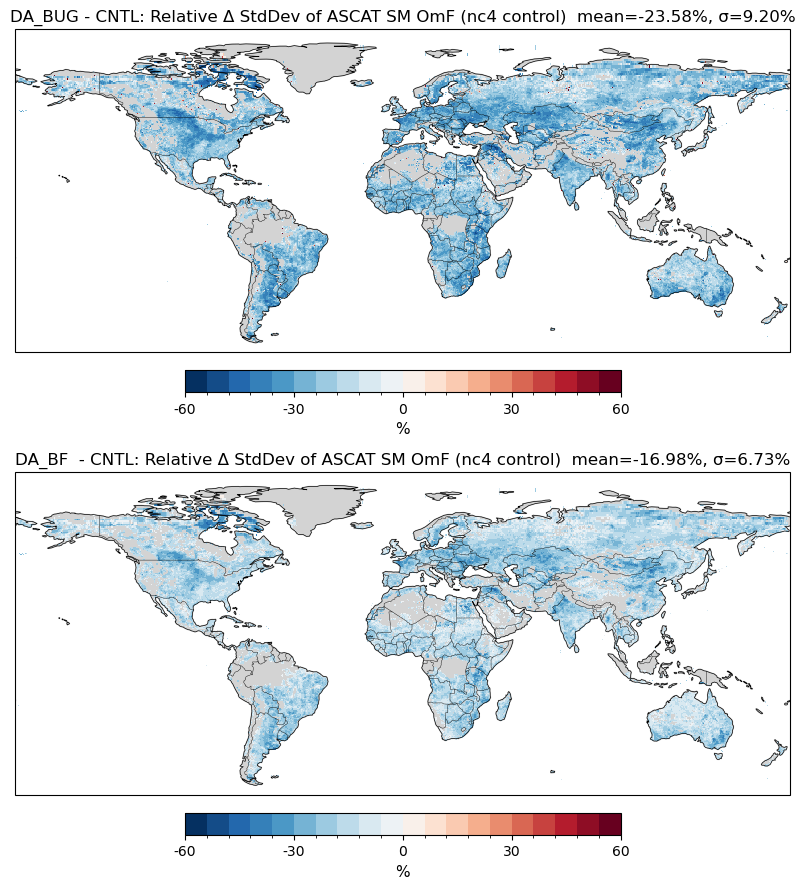

ASC_DA mean/std: -23.72020143973364 11.697320706883234
DA_BF mean/std: -16.977262085580083 6.731483925571074
DA_BUG mean/std: -23.581282273446195 9.204467433439632


In [46]:
# Relative Δ StdDev of ASCAT SM OmF: build two 2-panel figures
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap
from netCDF4 import Dataset
from pathlib import Path
from geospatial_plotting import load_ease_grid, build_ease_grid_mapping

start_date_str = '20150401'
end_date_str   = '20210401'
expt_1_name    = 'OLv7_M36_MULTI_type_13_comb_fp_scaled'
expt_2_name    = 'DAv7_M36_ASCAT_type_13_comb_fp_scaled'
comp_dir = Path('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/DAv7_M36_MULTI_type_13_comb_fp_scaled')

# NPZ control/ASC_DA and lon/lat
f1 = comp_dir / f"{expt_1_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz"
f2 = comp_dir / f"{expt_2_name}_{start_date_str}_{end_date_str}_obsfcstana_stats.npz"
ex1 = np.load(f1, allow_pickle=True)
ex2 = np.load(f2, allow_pickle=True)
lon = ex1['lon_tilenum'].flatten()
lat = ex1['lat_tilenum'].flatten()
unique_tilenum = np.array(ex1['unique_tilenum']).astype(int)
ex1_std = np.array(ex1['std_obs_minus_fcst_ascat']).flatten()  # CNTL (npz)
ex2_std = np.array(ex2['std_obs_minus_fcst_ascat']).flatten()  # ASC_DA

# ASC_DA vs CNTL (npz control)
rel_ex2 = np.full(lon.shape, np.nan)
valid_npz = ex1_std != 0
rel_ex2[valid_npz] = (ex2_std[valid_npz] - ex1_std[valid_npz]) / ex1_std[valid_npz] * 100.0
rel_ex2[rel_ex2 > 500] = np.nan
print('ASC_DA: relative >500%:', np.sum(rel_ex2 > 500))
print('ASC_DA: finite:', np.sum(np.isfinite(rel_ex2)))

# Helper to load NC4 and compute weighted ASCAT OmF
asc_idx = [4, 5, 6]; Nmin = 20

def load_nc(path):
    with Dataset(path, 'r') as nc:
        N = nc.variables['N_data'][:].filled(np.nan)
        OmF = nc.variables['OmF_stdv'][:].filled(np.nan)
        tile_var = next((np.array(nc.variables[k][:]).astype(int) for k in ['tile', 'tile_id', 'tilenum'] if k in nc.variables), None)
    return N, OmF, tile_var

def weighted_ascat(Ndata, OmF):
    Nm = Ndata.copy(); Om = OmF.copy(); Om[Nm < Nmin] = np.nan
    w = np.nansum(Nm[:, asc_idx], axis=1)
    val = np.nansum(Om[:, asc_idx] * Nm[:, asc_idx], axis=1) / w
    val[w == 0] = np.nan
    return val

def map_by_tile(vals, tile_var):
    if tile_var is None:
        tile_var = np.arange(1, vals.size + 1, dtype=int)
    tmap = {int(t): i for i, t in enumerate(tile_var)}
    out = np.full(unique_tilenum.shape, np.nan)
    for i, t in enumerate(unique_tilenum):
        idx = tmap.get(int(t))
        if idx is not None:
            out[i] = vals[idx]
    return out

# OL_BF (control), DA_BF, DA_BUG
N_ol, OmF_ol, tile_var_ol = load_nc(comp_dir / 'temporal_stats_OL_BF_20150401_20210331.nc4')
N_da, OmF_da, tile_var_da = load_nc(comp_dir / 'temporal_stats_DA_BF_20150401_20210331.nc4')
N_bug, OmF_bug, tile_var_bug = load_nc(comp_dir / 'temporal_stats_DA_20150401_20210331.nc4')

ctrl_nc4 = weighted_ascat(N_ol, OmF_ol)
da_vals  = weighted_ascat(N_da, OmF_da)
bug_vals = weighted_ascat(N_bug, OmF_bug)

mapped_ctrl_nc4 = map_by_tile(ctrl_nc4, tile_var_ol)
mapped_da       = map_by_tile(da_vals,  tile_var_da)
mapped_bug      = map_by_tile(bug_vals, tile_var_bug)

# Relative differences vs control
rel_da  = np.full_like(mapped_ctrl_nc4, np.nan)
rel_bug = np.full_like(mapped_ctrl_nc4, np.nan)
valid_nc4 = mapped_ctrl_nc4 != 0
rel_da[valid_nc4]  = (mapped_da[valid_nc4]  - mapped_ctrl_nc4[valid_nc4])  / mapped_ctrl_nc4[valid_nc4] * 100.0
rel_bug[valid_nc4] = (mapped_bug[valid_nc4] - mapped_ctrl_nc4[valid_nc4]) / mapped_ctrl_nc4[valid_nc4] * 100.0
for arr in (rel_da, rel_bug):
    arr[arr > 500] = np.nan
print('DA_BF: relative >500%:', np.sum(rel_da > 500), 'finite:', np.sum(np.isfinite(rel_da)))
print('DA_BUG: relative >500%:', np.sum(rel_bug > 500), 'finite:', np.sum(np.isfinite(rel_bug)))

# Map to EASE grid
lats_ease, lons_ease = load_ease_grid(); lats_row, lons_col = lats_ease[:, 1], lons_ease[1, :]
lon_grid, lat_grid = np.meshgrid(lons_col, lats_row)

def to_grid(data_vec):
    return build_ease_grid_mapping(np.column_stack([data_vec, lon, lat]), lats_row, lons_col)

grid_rel_ex2 = to_grid(rel_ex2)
grid_rel_da  = to_grid(rel_da)
grid_rel_bug = to_grid(rel_bug)

vmin, vmax = -60, 60
edges = np.linspace(vmin, vmax, 21)
cmap = get_cmap('RdBu_r', len(edges) - 1)
norm = BoundaryNorm(edges, cmap.N)

# Figure 1: ASC_DA vs CNTL (npz) and DA_BF vs CNTL (nc4)
fig1, axes1 = plt.subplots(2, 1, figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})
for ax, grid, title, rel in [
    (axes1[0], grid_rel_ex2, 'ASC_DA - CNTL: Relative Δ StdDev of ASCAT SM OmF (npz control)', rel_ex2),
    (axes1[1], grid_rel_da,  'DA_BF - CNTL: Relative Δ StdDev of ASCAT SM OmF (nc4 control)', rel_da),
]:
    pc = ax.pcolormesh(lon_grid, lat_grid, grid, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
    ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
    mean_val = np.nanmean(rel); std_val = np.nanstd(rel)
    ax.set_title(f"{title} mean={mean_val:.2f}%, σ={std_val:.2f}%", fontsize=12)
    ax.tick_params(labelsize=10)
    cbar = plt.colorbar(pc, ax=ax, orientation='horizontal', pad=0.05, fraction=0.06)
    cbar.set_label('%', fontsize=11)
    cbar.set_ticks(edges[::5]); cbar.ax.set_xticklabels([f"{t:.0f}" for t in edges[::5]]); cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

# Figure 2: DA_BUG vs CNTL and DA_BF vs CNTL (nc4 control)
fig2, axes2 = plt.subplots(2, 1, figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})
for ax, grid, title, rel in [
    (axes2[0], grid_rel_bug, 'DA_BUG - CNTL: Relative Δ StdDev of ASCAT SM OmF (nc4 control)', rel_bug),
    (axes2[1], grid_rel_da,  'DA_BF  - CNTL: Relative Δ StdDev of ASCAT SM OmF (nc4 control)', rel_da),
]:
    pc = ax.pcolormesh(lon_grid, lat_grid, grid, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.add_feature(cfeature.LAND, color='lightgray', zorder=0)
    ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
    mean_val = np.nanmean(rel); std_val = np.nanstd(rel)
    ax.set_title(f"{title}  mean={mean_val:.2f}%, σ={std_val:.2f}%", fontsize=12)
    ax.tick_params(labelsize=10)
    cbar = plt.colorbar(pc, ax=ax, orientation='horizontal', pad=0.05, fraction=0.06)
    cbar.set_label('%', fontsize=11)
    cbar.set_ticks(edges[::5]); cbar.ax.set_xticklabels([f"{t:.0f}" for t in edges[::5]]); cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

print('ASC_DA mean/std:', np.nanmean(rel_ex2), np.nanstd(rel_ex2))
print('DA_BF mean/std:', np.nanmean(rel_da), np.nanstd(rel_da))
print('DA_BUG mean/std:', np.nanmean(rel_bug), np.nanstd(rel_bug))
